## CMSE 410 Project
#### Katherine Perry

Next I will go through the kaggle tutorial to load in data from UCI Machine Learning Repository that has 106 DNA sequences, with 57 sequential nucleotides  each. Then I will analyze the outputs.

In [1]:
from hmmlearn import hmm

In [1]:
#https://www.kaggle.com/bulentsiyah/classifying-dna-sequences-markov-models-knn-svm/execution
# To make sure all of the correct libraries are installed, import each module and print the version number

import sys
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [3]:
classes = data.loc[:, 'Class']
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [4]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
# transpose the DataFrame
df = dframe.transpose()
# for clarity, lets rename the last dataframe column to class
df.rename(columns = {57: 'Class'}, inplace = True) 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,-
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [5]:
# desribe does not tell us enough information since the attributes are text. Lets record value counts for each sequence
series = []
for name in df.columns:
    series.append(df[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)

      0     1     2     3     4     5     6     7     8     9  ...    48  \
t  38.0  26.0  27.0  26.0  22.0  24.0  30.0  32.0  32.0  28.0  ...  21.0   
c  27.0  22.0  21.0  30.0  19.0  18.0  21.0  20.0  22.0  22.0  ...  36.0   
a  26.0  34.0  30.0  22.0  36.0  42.0  38.0  34.0  33.0  36.0  ...  23.0   
g  15.0  24.0  28.0  28.0  29.0  22.0  17.0  20.0  19.0  20.0  ...  26.0   
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     49    50    51    52    53    54    55    56  Class  
t  22.0  23.0  33.0  35.0  30.0  23.0  29.0  34.0    NaN  
c  42.0  31.0  32.0  21.0  32.0  29.0  29.0  17.0    NaN  
a  24.0  28.0  27.0  25.0  22.0  26.0  24.0  27.0    NaN  
g  18.0  24.0  14.0  25.0  22.0  28.0  24.0  28.0    NaN  
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  

[6 rows x 58 columns]


In [6]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch
# it to numerical data. This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [7]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(df.iloc[:5])

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0    0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1    0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2    0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3    1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4    0    0    0    1    0    1    0    0    0    0  ...     1     1     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     1     0     0     0     0     1      1  
1     0     0     1     0     0     0      1  
2     0     0     0     0     1     0      1  
3     0     1     0     1     0     0      1  
4     0     0     0     0     1     0      1  

[5 rows x 229 columns]


In [8]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'), 
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]

models = zip(names, classifiers)
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('Test-- ',name,': ',accuracy_score(y_test, predictions))
    print()
    print(classification_report(y_test, predictions))

Nearest Neighbors: 0.823214 (0.113908)
Test--  Nearest Neighbors :  0.7777777777777778

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Gaussian Process: 0.873214 (0.056158)
Test--  Gaussian Process :  0.8888888888888888

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree: 0.773214 (0.164838)
Test--  Decision Tree :  0.7777777777777778

              precision    recall  f1-score   support

           0       1.00      0.65    

C:\Users\kaper\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kaper\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kaper\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kaper\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net: 0.887500 (0.087500)


C:\Users\kaper\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test--  Neural Net :  0.9259259259259259

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27

AdaBoost: 0.912500 (0.112500)
Test--  AdaBoost :  0.8518518518518519

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.71      1.00      0.83        10

    accuracy                           0.85        27
   macro avg       0.86      0.88      0.85        27
weighted avg       0.89      0.85      0.85        27

Naive Bayes: 0.837500 (0.137500)
Test--  Naive Bayes :  0.9259259259259259

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91      

C:\Users\kaper\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kaper\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kaper\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kaper\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The defa

## Artificial Neural Network

In [9]:
# %load partSix.py
# Neural Networks Demystified
# Part 6: Training
#
# Supporting code for short YouTube series on artificial neural networks.
#
# Stephen Welch
# @stephencwelch


## ----------------------- Part 1 ---------------------------- ##
import numpy as np


## ----------------------- Part 5 ---------------------------- ##

class Neural_Network(object):
    def __init__(self, layer_i = 2, layer_o = 1, layer_h = 3):        
        #Define Hyperparameters
        self.inputLayerSize = layer_i
        self.outputLayerSize = layer_o
        self.hiddenLayerSize = layer_h
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 
        
## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res



In [10]:
train_vectors, test_vectors, train_labels, test_labels = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [11]:
print(train_vectors.shape)
print(train_labels.shape)
print(test_labels.shape)

(79, 228)
(79,)
(27,)


In [12]:
train_labels = train_labels.reshape(79,1)
test_labels = test_labels.reshape(27, 1)
print(train_labels.shape)

(79, 1)


In [13]:
#Run the training. 
NN = Neural_Network(228, 1, 1)
T = trainer(NN)
T.train(train_vectors, train_labels)

pred_labels = NN.forward(train_vectors)
print("Training Data error", np.sum((train_labels - pred_labels)*(train_labels-pred_labels))/len(train_vectors))
pred_labels = NN.forward(test_vectors)
print("Testing Data error", np.sum((test_labels - pred_labels)*(test_labels-pred_labels))/len(test_vectors))

Optimization terminated successfully.
         Current function value: 5.249998
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Training Data error 0.13291135349514457
Testing Data error 0.24416594345257464


In [45]:
#Run the training. 
NN = Neural_Network(228, 1, 4)
T = trainer(NN)
T.train(train_vectors, train_labels)

pred_labels = NN.forward(train_vectors)
print("Training Data error", np.sum((train_labels - pred_labels)*(train_labels-pred_labels))/len(train_vectors))
pred_labels = NN.forward(test_vectors)
print("Testing Data error", np.sum((test_labels - pred_labels)*(test_labels-pred_labels))/len(test_vectors))

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 52
         Function evaluations: 77
         Gradient evaluations: 77
Training Data error 4.3324210024242e-08
Testing Data error 0.03703565933203357


In [46]:
from sklearn.metrics import classification_report, accuracy_score
print('Test-- Artificial Neural Network:', 1 - np.sum((test_labels - pred_labels)*(test_labels-pred_labels))/len(test_vectors))

Test-- Artificial Neural Network: 0.9629643406679664


In [16]:
train_accuracies = []
test_accuracies = []
for h in range(1,6):
    #initialize the neural network
    NN = Neural_Network(228, 1, h)
    
    # train the model
    T = trainer(NN)
    T.train(train_vectors, train_labels)
    
    # make the predictions and calculate accuracy
    pred_labels = NN.forward(train_vectors)
    train_accuracies.append(1-np.sum((train_labels - pred_labels)*(train_labels-pred_labels))/len(train_vectors))
    pred_labels = NN.forward(test_vectors)
    test_accuracies.append(1-np.sum((test_labels - pred_labels)*(test_labels-pred_labels))/len(test_vectors))

Optimization terminated successfully.
         Current function value: 5.375009
         Iterations: 20
         Function evaluations: 35
         Gradient evaluations: 35


C:\Users\kaper\python\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in square


Optimization terminated successfully.
         Current function value: 1.125009
         Iterations: 40
         Function evaluations: 61
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 0.488633
         Iterations: 32
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 38
         Function evaluations: 52
         Gradient evaluations: 52


Text(0, 0.5, 'Training Accuracy')

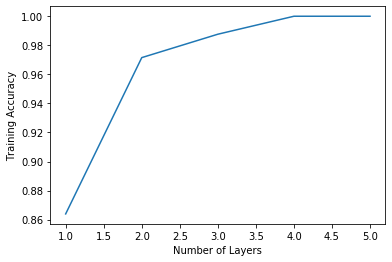

In [19]:
layers = [1,2,3,4,5]
plt.plot(layers, train_accuracies)
plt.xlabel("Number of Layers")
plt.ylabel("Training Accuracy")

Text(0, 0.5, 'Testing Accuracy')

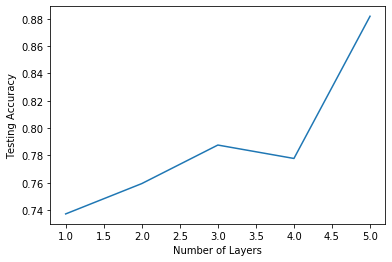

In [20]:
layers = [1,2,3,4,5]
plt.plot(layers, test_accuracies)
plt.xlabel("Number of Layers")
plt.ylabel("Testing Accuracy")

## Hidden Markov Model

In [22]:
from hmmlearn import hmm
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################


# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

ModuleNotFoundError: No module named 'hmmlearn'

In [31]:
df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
